In [86]:
LOs = '''Identify/characterize/define a programming problem
Understand and be able to use a variety of data types, control structures, and algorithmic problem-solving techniques in their programming
Design, document, implement and test solutions to programming problems
Express creativity using coding and technology in a variety of contexts
Identify and repair coding errors in a program
effectively communicate programming solutions to others
work collaboratively to write modular code on larger projects'''.split('\n')
print(LOs)

['Identify/characterize/define a programming problem', 'Understand and be able to use a variety of data types, control structures, and algorithmic problem-solving techniques in their programming', 'Design, document, implement and test solutions to programming problems', 'Express creativity using coding and technology in a variety of contexts', 'Identify and repair coding errors in a program', 'effectively communicate programming solutions to others', 'work collaboratively to write modular code on larger projects']


In [90]:
# # DANGEROUS CODE
# import shutil
# for key in final_comments.keys():
#     try:
#         shutil.rmtree(key)
#     except:
#         print(f"{key} deleted.")

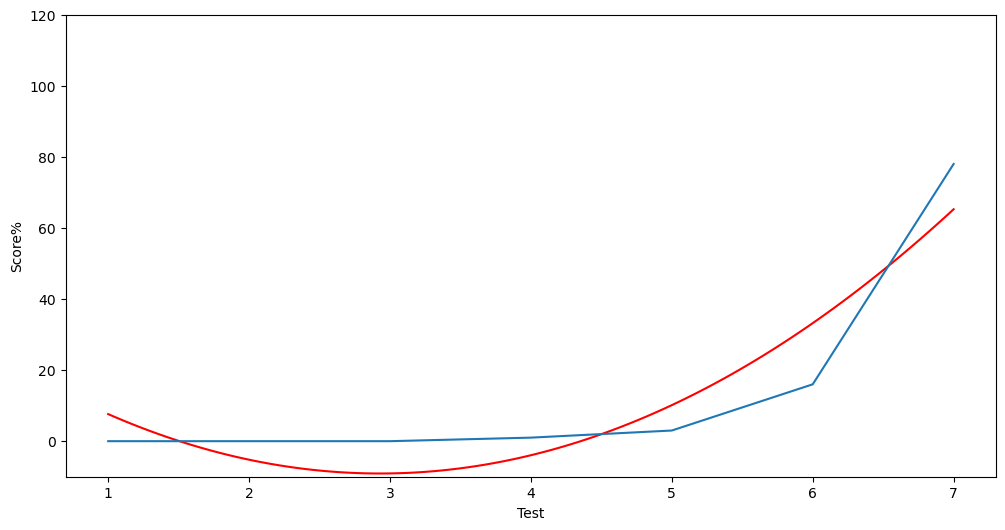

In [7]:
import csv, os, numpy as np
#from scipy.optimize import curve_fit
#import matplotlib.pyplot as plt


with open('Comments.csv') as f:
    HEADER = next(f)
    arr = list(csv.reader(f))
#     print(arr)
#     outcome = {[int(i.strip()) for i in arr[3].split(':')][c]: [int(i.strip()) for i in arr[3].split(':')][c+1] for c, i in enumerate([int(i.strip()) for i in arr[3].split(':')])}
student_info = {line[0]:line[1:] for line in arr}
columns = np.array(arr).T
names = list(columns[0])

final_comments = {name:f'{name.title()},\nIn Computer Science, ' for name in names}
for key in final_comments.keys():
    os.mkdir(key)
    student_info[key][1] = [int(x) for x in student_info[key][1][:-1].split('%, ')]
    final_comments[key] += overall_grade(student_info[key][1])
    final_comments[key] += attendance(student_info[key][0])
    final_comments[key] += lo_interpreter(student_info[key][2])
    final_comments[key] += student_info[key][3]
    final_comments[key] += '\nIn your reflection, you said: "' + student_info[key][4] + '" Thank you for your contribution.'
    final_comments[key] += all_improve(student_info[key][1])
    all_improve(student_info[key][1],key)
    with open(f'{key}/comment_text.txt', 'w') as f:
        f.write(final_comments[key])
# for key in final_comments:
# print(final_comments[input('Name of student?').strip().title()])

In [1]:
def attendance(string):
    n = int(string[:-1])
    if string == '100%':
        return '\nYou attended all classes. Thank you.'
    elif n > 90:
        return '\nYou showed up to most classes, thank you.'
    elif n > 70:
        return '\nYour attendence was OK, but I would hope you show up more often in the future.'
    else:
        return '\nYou did not show up to class enough. Please do better.'
import numpy as np

generals=['You truly achieved an extraordinary job',
          'You\'ve done a solid job this semester',
          'You made acceptable progress overall',
          'You have a lot much to work on, but you are on the right track',
          'You are beginning to understand the fundamentals, but not much more']

def overall_grade(grades:list):
    grade = round(np.mean(grades),2)
    if grade >= 93:
        return f'{generals[0]}, scoring a {grade}%.'
    if grade >= 87:
        return f'{generals[1]}, scoring a {grade}%.'
    if grade >= 80:
        return f'{generals[2]}, scoring a {grade}%.'
    if grade >= 70:
        return f'{generals[3]}, scoring a {grade}%.'
    if grade >= 60:
        return f'{generals[4]}, scoring a {grade}%.'
    else:
        return f'You failed, scoring a {grade}%'

In [6]:
def last_comma(string):
    try:
        comma_index = string.rindex(',')
    except:
        return string
    string = list(string)
    string[comma_index] = ' and'
    string = ''.join(string)
    return string
#lo means learning outcomes
#let lo a list consists of tuples. for example, [(1, 4), (2, 3), (3, 4), (4, 3)]
def lo_interpreter (lo:str):
    lo = lo.split(', ')
    lo = [(int(x[0]),int(x[-1])) for x in lo]
    excel = []
    good = []
    okay = []
    bad = []
    for l in lo:
        if l[1] == 4:
            excel.append(l[0])
        elif l[1] == 3:
            good.append(l[0])
        elif l[1] == 2:
            okay.append(l[0])
        else:
            bad.append(l[0])
    final = '\n'
    if excel != []:
        final += (last_comma(f'You show sophisticated and comprehensive understanding to L.O. {str(excel)[1:-1]}.\n'))
    if good != []:
        final += (last_comma(f'You have made good progress and you handle L.O. {str(good)[1:-1]}.\n'))
    if okay != []:
        final += (last_comma(f'You have basically met the goal of L.O. {str(okay)[1:-1]} but there\'s still space to improve!\n'))
    if bad != []:
        final += (last_comma(f'You failed to prove your capablity of understanding L.O. {str(bad)[1:-1]}. I hope you can improve\
 in the future!\n'))
    return final
print(lo_interpreter("1: 4, 2: 0, 3: 0, 4: 0"))


You show sophisticated and comprehensive understanding to L.O. 1.
You failed to prove your capablity of understanding L.O. 2, 3 and 4. I hope you can improve in the future!



In the semester, 50% of the time you were improving, and 50% of the time you weren't.


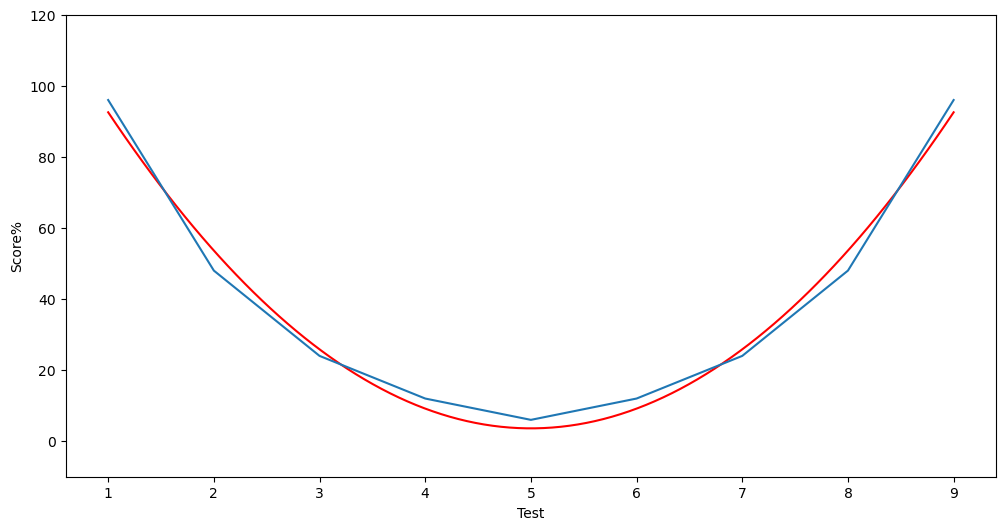

In [4]:
import numpy as np
from sympy import Symbol
from sympy import lambdify
def trend(scores:list):
    from scipy.optimize import curve_fit
    import matplotlib.pyplot as plt
    from sklearn.metrics import r2_score
    import numpy as np
    times = np.arange(1,len(scores)+1,1)
    scores = np.array(scores)
    score=plt.plot(scores)
    r2 = 0
    c=0
    b=True
    while b:
        c+=1
        trend = np.polyfit(times, scores, c)
        trend_e = np.poly1d(trend)
        trendline = plt.plot(times, trend_e(times))
        plt.close()
        r2 = r2_score(trendline[0].get_data()[1], scores)
        if r2>=0.6:
            b = False

    times_range = np.linspace(min(times),max(times),100)
    fig, ax = plt.subplots(figsize=(12, 6))
    plt.xlabel('Test')
    plt.ylabel('Score%')
    plt.ylim(-10,120)
    trendline = ax.plot(times_range, trend_e(times_range),color="red") # .savefig('my_plot.png')
    score = ax.plot(times, scores)
    
    equation = [int(float(x.strip())) if float(x.strip()).is_integer() else float(x.strip()) for x in str([trend_e])[9:-3].split(',')]
    degree = len(equation) -1
    equation = [f'{num}*x**{degree-i}' for i,num in enumerate(equation)]
    
    return ' + '.join(equation).replace('**1','').replace('x**0','').replace('+ -','- ').strip('*'),fig


def derivative(expression):
    import sympy
    from sympy import Symbol
    from sympy.parsing.sympy_parser import parse_expr

    x = Symbol('x')
    exp = parse_expr(expression)

    return exp.diff()

# derivative(trend([80,90,60,100,90,70]))


def improve_index(equa,scores):
    x = Symbol('x')
    import sympy
    if type(equa) == sympy.core.numbers.Float:
        equa += x*10**-100 # it needed an x
    start= 1
    end= len(scores)
    n_range = np.arange(start,end,(end-start)/100)

    f = lambdify(x, equa)
    rates = f(n_range)
    count = 0



    for i in rates:
        if i<=0:
            count += 1
    return (100-count)/100

def improvement_p(index):
    final = ''
    try:
        assert index<=1
        final += f"In the semester, {round(index*100)}% of the time you were improving"
        if 1-index >0:
            final += f", and {round((1-index)*100)}% of the time you weren't."
    except AssertionError:
        pass
    if final:
        return final

def all_improve(lst, savepic = False):
    if type(lst) == str: #                        from here
        lst = lst[:-1].split('%, ')
        lst = [int(x) for x in lst]
    else:
        if type(lst[0]) == str:
            if '%' in list[0]:
                lst = [int(x[:-1]) for x in lst]
            else:
                lst = [int(x) for x in lst] #     until here is just making sure the input is good
    if all([x == lst[0] for x in lst]):
        return 'You kept your scores perfectly consistant.'
    if savepic:
        trend(lst)[1].savefig(savepic + '/improvement_graph')
    else:
        return improvement_p(improve_index(derivative(trend(lst)[0]), lst))
print(all_improve([16*6,8*6,4*6,2*6,1*6,2*6,4*6,8*6,16*6]))
# print(all_improve([1,2,4,8,16,32]))

In [32]:
import sympy
(sympy.core.numbers.Integer(10))

10

0.0


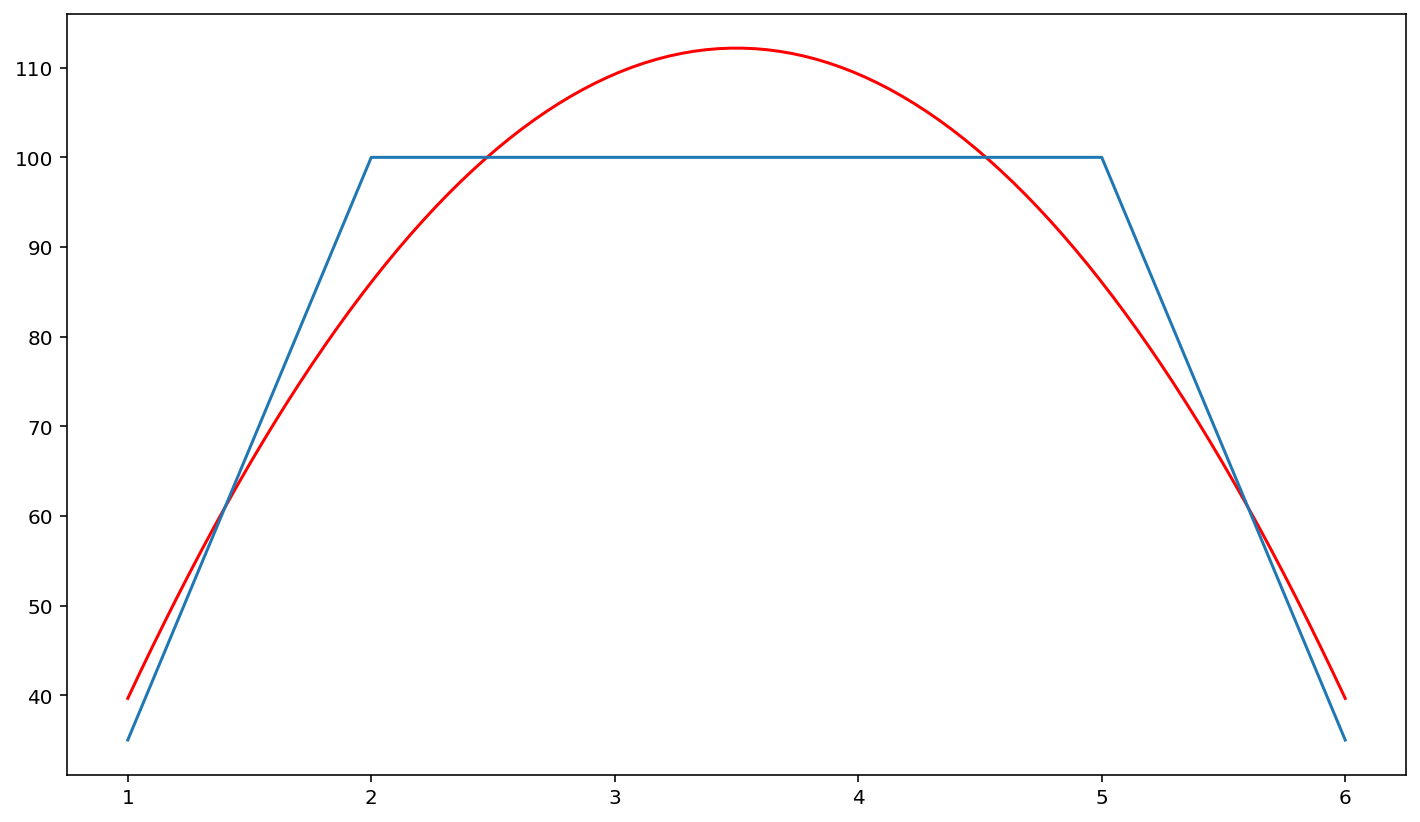

In [45]:
# def all_improve(lst):
#     if type(lst) == str:
#         lst = lst[:-1].split('%, ')
#         lst = [int(x) for x in lst]
#     return improve_index(derivative(trend(lst)), lst)
# print(all_improve('35%, 100%, 100%, 100%, 100%, 35%'))

In [5]:
# :( no use so sad
def sum_differences(lst):
    return sum([lst[i]-lst[i-1] for i in range(1,len(lst))])

def improvement(grades:list):
    grades = [int(x[:-1]) for x in grades]
    minmax = {}
    for i, start in enumerate(grades):
        for j, grade in enumerate(grades[i+1:]):
            minmax[grade-start] = (i+1,j+i+2)
    (mn,mx) = minmax[max(minmax.keys())]
    if max(minmax.keys()) > 15:
        return f'From your {ith(mn)} test to your {ith(mx)} test, you improved significantly. Nice job!'
    elif sum_differences(grades) < -20:
        return 'You showed a downward trend throughout this semester. Hope you can improve in the future!'
    elif max(grades) - grades[mx-1] > 15:
        print(f"Great job on your {ith(1+grades.index(max(grades)))} test!")
    else:
        print('You have stayed consistant with your test scores throughout this semester.', end = '')
        if min(grades) > 82:
            print(' Nice job!')
        elif min(grades) > 70:
            print()
        else:
            print(' I hope to see improvement.')
print(improvement(['60%','100%','80%']))

def last_comma(string):
    try:
        comma_index = string.rindex(',')
    except:
        return string
    string = list(string)
    string[comma_index] = ' and'
    string = ''.join(string)
    return string


From your first test to your second test, you improved significantly. Nice job!
